## 08 그래프 만들기

## 08-1 파이썬으로 만들 수 있는 그래프 살펴 보기

- seaborn 사이트 살펴 보기 : https://seaborn.pydata.org/
- Gallery에 다양한 그래프 살펴보기

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

## Lab 1 :  산점도 - 변수 간 관계 표현하기

- 나이와 따른 소득 처럼 연속된 값으로 된 두 변수의 관계를 표현할 때 사용

In [ ]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [ ]:
import seaborn as sns

In [ ]:
# 배기량(disp)에 따른 고속도로 연비(hwy)의 관계 표시
# 배기량(disp) 변수를 x축에, 고속도로 연비(hwy) 변수를 y축에 놓고 산점도 생성
sns.scatterplot(data=mpg, x='displ', y='hwy')

In [ ]:
# x 축 범위 설정
# x 축의 범위를 3 ~ 6으로 제한 
sns.scatterplot(data=mpg, x='displ', y='hwy')\
   .set(xlim = (3, 6))

In [ ]:
# y 축 범위 설정
# x 축의 범위를 3 ~ 6으로 제한 
# y 축의 범위를 10 ~ 30으로 제한 
sns.scatterplot(data=mpg, x='displ', y='hwy')\
   .set(xlim = (3, 6), ylim = (10, 30))

In [ ]:
# hue를 이용하면 marker의 색깔을 종류별로 다르게 표현 가능
# 배기량(disp)에 따른 고속도로 연비(hwy)의 관계 표시
# 구동방식(drv)에 따라 marker의 색깔을 다르게 표시
sns.scatterplot(data=mpg, x='displ', y='hwy', hue = 'drv')

> 고속도로 연비 비교 ?
1. 배기량이 큰 차는 고속도로 연비가 낮다.

> 고속도로 연비 비교 ?
1. 전륜구동(f) 자동차는 고속 도로 연비가 높다.
2. 후륜구종(r) 자동차는 고속 도로 연비가 낮다.

> 고속도로 연비 비교 ?
1. 전륜구동(f) 자동차이기 때문에 고속 도로 연비가 높다.
2. 후륜구종(r) 자동차이기 때문에 고속 도로 연비가 낮다.

> 고속도로 연비 비교 ?
1. 전륜구동(f) 자동차는 대부분 배기량이 4이하이고, 고속 도로 연비가 높다.
2. 후륜구종(r) 자동차는 대부분 배기량이 4이상이고, 고속 도로 연비가 낮다.

## Lab 2 : 혼자서 해보기
- mpg와 midwest 데이터를 이용하여 데이터 분석

### Q1 : mpg 데이터에서 도시연비(cty)와 고속도로 연비(hwy)사이에 관계를 알아보려고 함
- x축은 cty, y축은 hwy로된 산점도를 표시하시오
- 서로 양의 상관관계가 있음을 추정할 수 있음

In [ ]:
sns.scatterplot(data=mpg, x='cty', y='hwy')

In [ ]:
sns.scatterplot(data=mpg, x='cty', y='hwy', hue='drv')

## Q2 : 미국 지역별 인구 정보 데이터 midwest.csv를 이용하여 분석한다
- x축은 지역별 전체 인구(poptotal)
- y축은 아시아계 인구(popasian)
- 전체 인구는 50만명 이하, 아시아 인구는 1만명 이하 지역만 산점도에 표시함

In [ ]:
midwest = pd.read_csv('midwest.csv')

In [ ]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian')\
   .set( xlim = (0, 500000), ylim=(0, 10000))

## 08-3 막대 그래프 - 집단 간 차이 표현하기

- 성별 소득 차이 처럼 집단 간 차이를 표시할 때 사용

## Lab 3 : 평균 막대 그래프 만들기

### 1. 집단별 평균표 만들기
- 구동방식(drv)별 고속도로 연비 평균 비교 그래프 만들기

In [ ]:
mpg = pd.read_csv('mpg.csv')

In [ ]:
mpg.head()

In [ ]:
# 구동방식(drv)별로 고속도로 연비(hwy) 평균 구하기
# 그룹에 사용하는 컬럼(변수)가 기본적으로 인덱스가 된다.
# 컬럼(변수)을 인덱스로 생성하지 않기 위해서 'as_index=False' 사용
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

In [ ]:
# 구동방식(drv)별 평균 고속도로 연비(mean_hwy)를 막대 그래프로 그리기
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [ ]:
df_mpg

In [ ]:
# 평균 연비 크기 순으로 내림차 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
df_mpg

In [ ]:
# 구동방식(drv)별 평균 고속도로 연비(mean_hwy)를 막대 그래프로 그리기
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

## Lab 4 : 빈도 막대 그래프 만들기

### 1. 집단별 빈도표 만들기
- mpg 데이터에서 구동방식(drv)별 빈도표를 만들기

In [ ]:
# 구동방식(drv)별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False).agg(count_drv=('drv', 'count'))
df_mpg

In [ ]:
# 구동 방식(drv)별 막대 그래프 만들기
sns.barplot(data=df_mpg, x='drv',y='count_drv')

In [ ]:
# sns.countplot()으로 구동방식에 따른 빈도 막대 그래프 만들기
sns.countplot(data=mpg, x='drv')

In [ ]:
# sns.countplot()으로 구동방식에 따른 빈도 막대 그래프 만들기
# 표시 순서는 ['4', 'f', 'r'] 순서
sns.countplot(data=mpg, x='drv', order = ['4', 'f', 'r'])

In [ ]:
# sns.countplot()으로 구동방식에 따른 빈도 막대 그래프 만들기
# 표시 순서는 빈도 수가 큰 순서
sns.countplot(data=mpg, x='drv', order = mpg['drv'].value_counts().index)

## Lab 5 : 혼자 해보기 (mpg 데이터 분석)

### Q1 : 'suv' 차종을 대상으로 cty(도시연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현하기

In [ ]:
mpg = pd.read_csv('mpg.csv')

In [ ]:
mpg.head(3)

In [ ]:
# suv 차량만 추출
mpg.query('category=="suv"').head(3)

In [ ]:
# suv 차량만 추출
# suv를 만드는 회사별로 도시연비 평균을 구함
mpg.query('category=="suv"')\
    .groupby('           ', as_index=False)\
    .agg(mean_cty = ('      ', '        '))

In [ ]:
# suv 차량만 추출
# suv를 만드는 회사별로 도시연비 평균을 구함
# 도시 연비 평균이 높은 회사 순으로 출력
mpg.query('category=="suv"')\
    .groupby('            ', as_index=False)\
    .agg(mean_cty = ('       ', '         '))\
    .sort_values('          ', ascending=False)

In [ ]:
# suv 차량만 추출
# suv를 만드는 회사별로 도시연비 평균을 구함
# 도시 연비 평균이 높은 회사 순으로 상위 5개 출력
df = mpg.query('category=="suv"')\
    .groupby('         ', as_index=False)\
    .agg(mean_cty = ('     ', '      '))\
    .sort_values('       ', ascending=False).head(5)
df

In [ ]:
# suv를 만드는 회사별로 도시연비 평균을 구함
# 도시 연비 평균이 높은 회사 순으로 상위 5개 막대 그래프 출력
sns.barplot(data=df, x='           ', y='         ')

### Q2 :  자동차 중 어떤 category의 차가 많은지 알아보려고 함
- sns.barplot()을 이용하여 자동차 종류별 빈도를 표현한 그래프를 그리시오
- 막대는 빈도가 높은 순으로 정렬하시오

In [ ]:
# 자동차 category별 자동차 수 테이블 만들고, 내림차순 정렬한 테이블을
# 데이터 프레임 df에 저장
df = mpg.groupby('           ', as_index=False)\
        .agg(n = ('         ', '       '))\
        .sort_values('n', ascending=False)

In [ ]:
# sns.barplot()을 이용하여 자동차 종류별 빈도를 표현한 그래프 그리기
sns.barplot(data=df, x='         ', y='  ')

## 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

- 선 그래프는 데이터를 선으로 표현한 그래프로, 시간에 따라 달라지는 데이터를 표현할 때 자주 사용함

## Lab 6 : 시계열 그래프 만들기 - econimics 데이터 분석
- econimics : 미국의 여러 경제 지표를 월별로 나타낸 그래프
- 시간에 따라 실업자 수가 어떻게 변하는지 시계열 그래프를 만들어 보자
- 출처 : bit.ly/easypy_85

In [ ]:
# economics 데이터 불러 오기
import pandas as pd
economics = pd.read_csv('economics.csv')
economics.head()

In [ ]:
# economics 데이터의 변수 유형 및 Null 건수 알아보기  
economics.info()

In [ ]:
# lineplot()을 이용하여 선 그래프 작성
# x축 date에 여러 날자가 겹쳐 출력됨
import seaborn as sns
sns.lineplot(data = economics, x = 'date', y='unemploy')

In [ ]:
# 변수 date의 유형을 date 타입으로 변경하여 date2 생성
economics['date2'] = pd.to_datetime(economics['date'])

In [ ]:
# economics 데이터의 변수 유형 및 Null 건수 알아보기  
# 변수 date, date2 유형 비교
economics.info()

- 변수의 타입을 날짜 시간 타입으로 변경하여도 값이 달라지지 않음
- 날짜 시간 타입 데이타는 df.dt를 이용하여 연, 월, 일을 추출할 수 있음

In [ ]:
economics[['date', 'date2']].head()

In [ ]:
# 연, 월, 일 추출
economics['date2'].dt.year

In [ ]:
# 연, 월, 일 추출
economics['date2'].dt.month

In [ ]:
# 연, 월, 일 추출
economics['date2'].dt.day

- 연도 변수만들기

In [ ]:
# 연도 변수 추가하기
economics['year'] = economics['date2'].dt.year
economics.head()

In [ ]:
# 월 변수 추가하기
economics['month'] = economics['date2'].dt.month
economics.head(20)

- x축에 연도 표기하기

In [ ]:
# x 축에 연도 표기
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

In [ ]:
# x 축에 연도 표기
sns.lineplot(data = economics, x = 'year', y = 'unemploy', hue='month')

In [ ]:
# x 축에 연도 표기 (선 위 아래 표시 면적은 신뢰구간)
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

- (그래프 분석) 실업자 수가 약 5년을 주기로 등락을 반복함
- 2005년 부터 급격히 증가 했다가 2010년 부터 다시 감소 추세

## Lab 7 : 혼자서 해보기 (economics 데이터 분석 그래프 만들기)
- economics 데이터에서 개인저축률(psavert)을 분석해 보기

### Q1 : psavert(개인 저축률)가 시간에 따라 어떻게 변해왔는지, 연도별 개인 저축률의 변화 그래프를 만들어 보자

In [ ]:
# economics 데이터 불러 오기
import pandas as pd
import seaborn as sns
economics = pd.read_csv('economics.csv')

In [ ]:
# economics 데이터에서 변수 date의 유형을 datetime으로 변경하여 변수 date2로 저장
economics['date2'] = pd.to_datetime(economics['date'])

In [ ]:
# economics 데이터 프레임 변수 date2에서 연도를 추출하여 변수 year로 저장 
economics['year'] = economics['date2'].dt.year

In [ ]:
# economics 데이터 프레임 데이터 5개 행 출력
economics.head()

In [ ]:
# economics 데이터 프레임에서 연도(year)별 개인저축률(psacert) 선 그래프 그리기
sns.lineplot(data=economics, x = 'year', y = 'psavert', ci=None)

- 데이터가 수집된 1970년부터 역 2005년까지 지속적으로 개인 저축률이 감소하다가 2005년 부터 다시 증가하기 시작함

### Q2 : 2014년 월별 psavert(개인 저축률)의 변화를 시계열 그래프로 그려보세요
- df.query() 사용

In [ ]:
# economics 데이터 프레임 변수 date2에서 월을 추출하여 변수 month로 저장 
economics['month'] = economics['date2'].dt.month

In [ ]:
# economics 데이터 프레임에서 2014년 데이터만 추출하여 데이터 프레임 df_2014에 저장
df_2014 = economics.query('year == 2014')

In [ ]:
df_2014.head()

In [ ]:
# economics 데이터 프레임에서 2014년 월별 개인저축률 선 그래프 그리기
sns.lineplot(data=df_2014, x='month', y='psavert', ci=None)

## 08-5 상자 그림 - 집단 간 분포 차이 표현하기

- 상자 그림(Box Plot)은 데이터가 퍼져있는 형태를 직사각형 상자 모양으로 표현한 그래프

## Lab 8 : 상자 그림 만들기
- mpg 데이터를 이용하여 '구동방식(drv)별 고속도로 연비(hwy)'를 표현하기

In [ ]:
# mpg 데이터 읽어오기
import pandas as pd
import seaborn as sns
mpg = pd.read_csv('mpg.csv')

In [ ]:
# x축을 구동방식(drv), y축을 고속도로연비(hwy)로 지정하고,
# 구동방식(drv)별 고속도로 연비(hwy)를 상자그림으로 표현하기
sns.boxplot(data=mpg, x='drv', y='hwy')

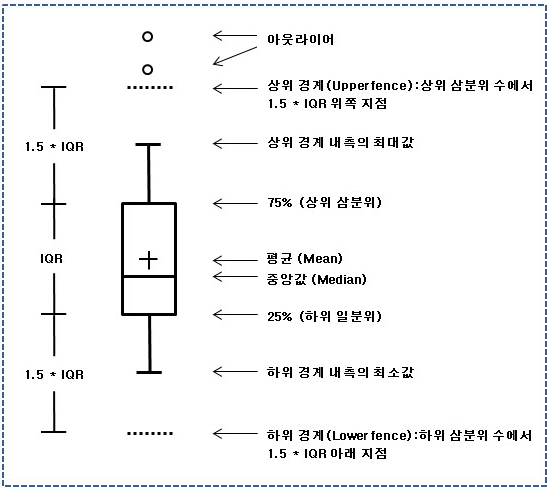

- 전륜 구동(f)은 연비가 평균적으로 높고, 연비가 극단적으로 높거나 낮은 자동차가 존재함
- 4륜 구종(4)은 연비 평균이 다른 구동방식에 비해 낮음
- 후륜 구동(r)은 극단치가 없고, 자동차 대부분이 사분위 범위에 포함됨

## Lab 8 : 혼자해 보기 - mpg 데이터를 분석해 보기
- mpg 데이터를 이용하여 '자동차 종류별 도시 연비'를 비교해 보시오

### Q1 : 자동차 종류(category)중 'compact', 'subcompact', 'suv' 차종에 대한 도시 연비(cty)를 비교해 보시오
- df.query() 사용
- sns.boxplot()

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
#  mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

In [ ]:
# "compact", "subcompact", "suv" 차종 데이터 추출
df = mpg.query('category in ["compact", "subcompact", "suv"]')
df.value_counts()

In [ ]:
# 상자 그림 만들기
sns.boxplot(data=df, x='category', y='cty')

- suv의 도시 연비가 가장 낮음